# Analysis of retrained model 200
Model 200 is a Beta-VAE with a `beta=8` which has been trained on `dpsrites full` for `300000 steps`.
A version of it has been `saved very 1000 steps`. Correlation and covariance of its mean representation have then been computed at each step.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
import glob
import pandas as pd
import json
from IPython.display import HTML
rc('animation', html='html5')

In [74]:
sns.set(font_scale=1.5)

In [3]:
files = glob.glob("/media/bonheml/phd_data/VAE_retrained_models/200/*/metrics/mean/truncated_unsupervised/results/aggregate/evaluation.json")
corrs = []
covars = []
for file in files:
    with open(file) as f:
        res = json.load(f)
        corrs.append(np.array(res["evaluation_results.correlation_matrix"]))
        covars.append(np.array(res["evaluation_results.covariance_matrix"]))

## Overview of the correlation the results

Correlation at step 0 is mostly low with highest values in $z_1$, $z_4$ and $z_6$. By looking at the covariance heatmap, we can see that these variables are passive.

<AxesSubplot:>

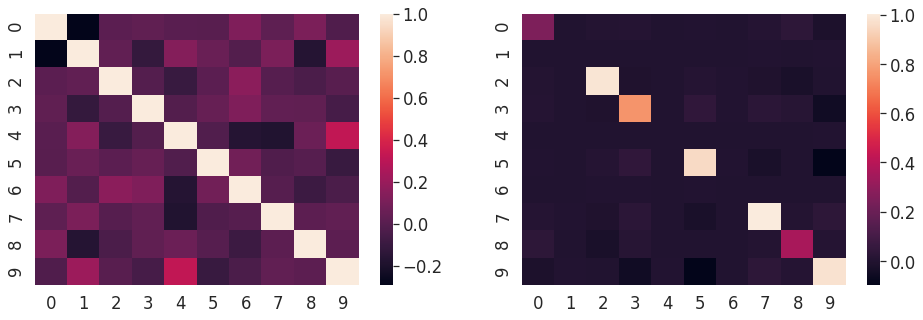

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.heatmap(corrs[0], ax=ax1)
sns.heatmap(covars[0], ax=ax2)

Correlation at step 1000 is increasing for $z_1$, $z_4$ and $z_6$. By looking at the covariance heatmap, we can see that these variables are still passive and have a lower covariance than before.

<AxesSubplot:>

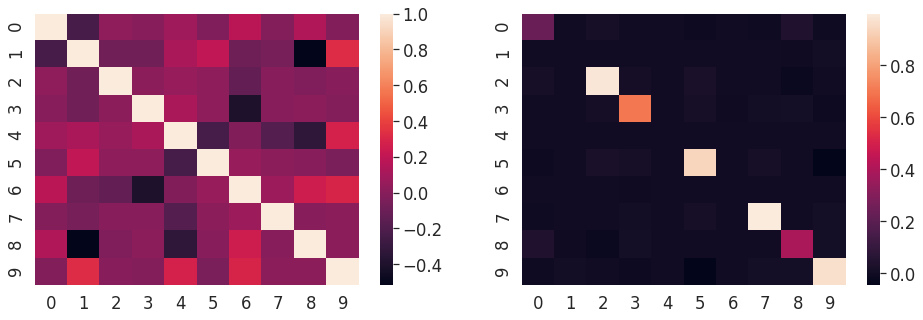

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.heatmap(corrs[1], ax=ax1)
sns.heatmap(covars[1], ax=ax2)

At step 100000 the correlation of $z_1$, $z_4$ and $z_6$ is a bit lower. By looking at the covariance heatmap, we can see that these variables are still passive with low covariance.

<AxesSubplot:>

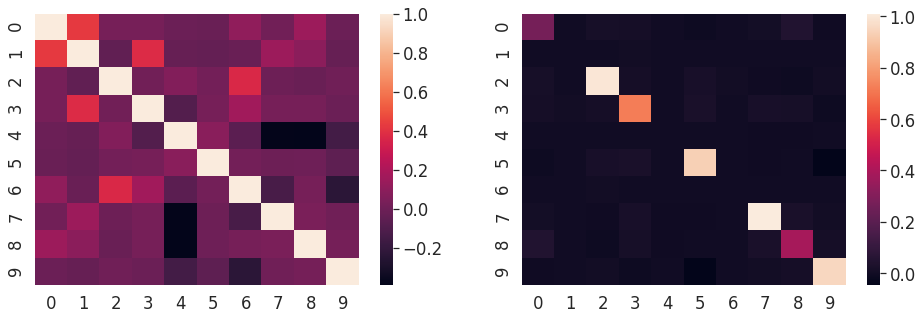

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.heatmap(corrs[100], ax=ax1)
sns.heatmap(covars[100], ax=ax2)

At step 200000 the correlation of $z_1$, $z_4$ and $z_6$ is a bit lower. By looking at the covariance heatmap, we can see that these variables are still passive with low covariance. The covariance of some non passive variables is slightly increased

<AxesSubplot:>

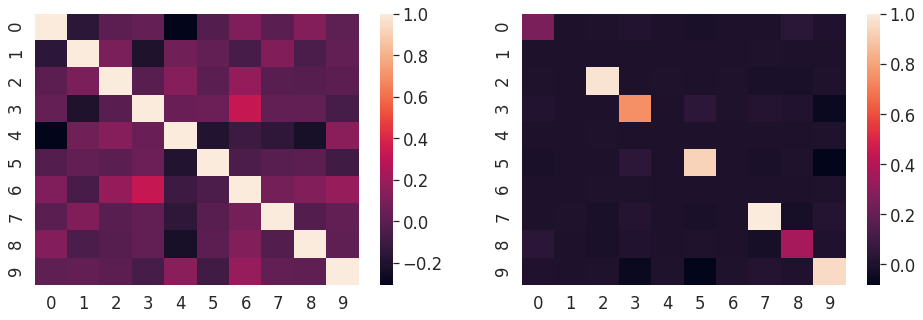

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.heatmap(corrs[200], ax=ax1)
sns.heatmap(covars[200], ax=ax2)

At step 299000 the correlation of $z_1$, $z_4$ and $z_6$ are again higher, especially $corr(z_1, z_8)$. By looking at the covariance heatmap, we can see that these variables are still passive with low covariance.

<AxesSubplot:>

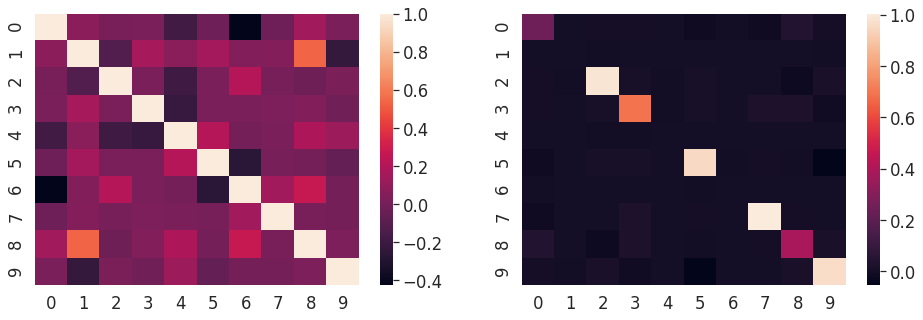

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
sns.heatmap(corrs[299], ax=ax1)
sns.heatmap(covars[299], ax=ax2)

## An animated version
We can see that correlation is varying a lot

CalledProcessError: Command '['convert', '-size', '432x288', '-depth', '8', '-delay', '3.3333333333333335', '-loop', '0', 'rgba:-', '/home/bonheml/Desktop/200_corrs.gif']' returned non-zero exit status 2.

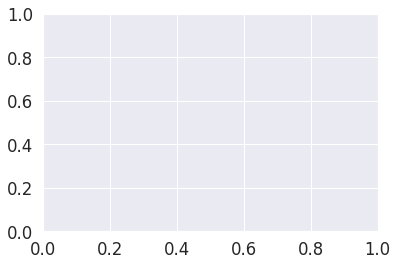

In [80]:
fig = plt.figure()

def animate(i):
    plt.clf()
    plt.cla()
    ax = sns.heatmap(corrs[i], vmin=-1, vmax=1)
    ax.set_title('Frame: ' + str(i))
    
anim = animation.FuncAnimation(fig, animate, frames=300)
anim.save("/home/bonheml/Desktop/200_corrs.gif", writer='imagemagick', fps=30)
HTML(anim.to_jshtml())

While covariance stays pretty much the same for passive variables since early in the training. Only mixed variables tends to change over time.

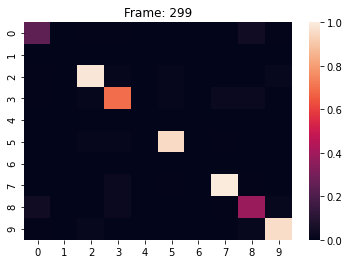

In [51]:
fig = plt.figure()

def animate(i):
    plt.clf()
    plt.cla()
    ax = sns.heatmap(covars[i], vmin=0, vmax=1)
    ax.set_title('Frame: ' + str(i))
    
anim = animation.FuncAnimation(fig, animate, frames=300)
anim.save("/home/bonheml/Desktop/200_covars.gif", writer='imagemagick', fps=30)
HTML(anim.to_jshtml())

## Investigating factor to factor relationship over time

In [9]:
df = []

for i in range(10):
    for j in range(10):
        df += [{"factor_1": i, "factor_2": j, "correlation": corrs[n][i, j], "covariance":covars[n][i, j], 
                "step": n} for n in range(300)]
df = pd.DataFrame(df)

## Factor $z_0$

Correlation is only varying much for the passive variables ($z_1$, $z_4$, and $z_8$) for which the covariance is always quite low.

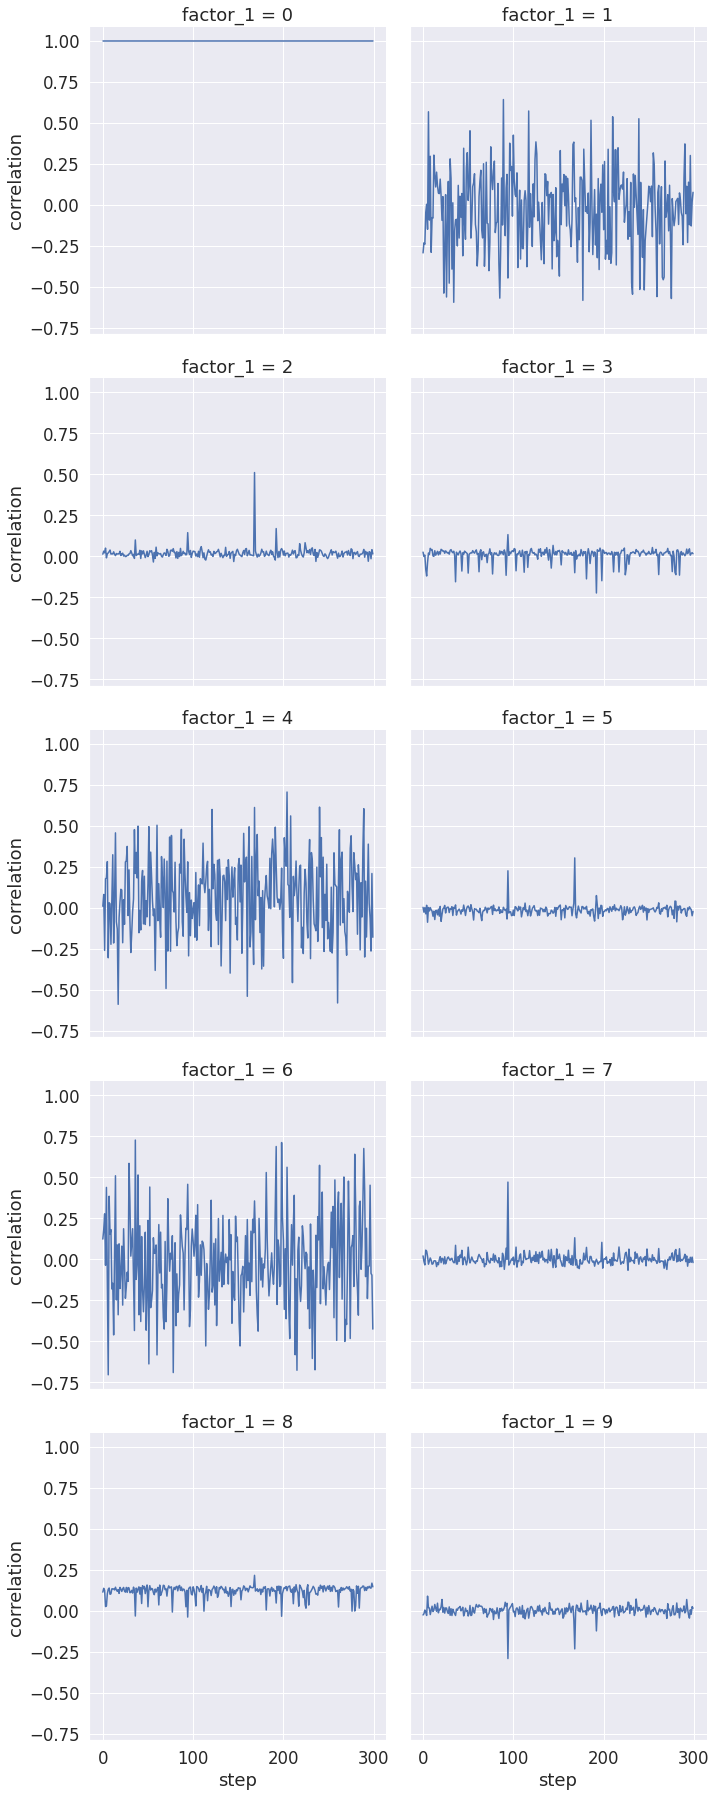

In [81]:
sns.relplot(
    data=df.loc[df["factor_2"]== 0], x="step", y="correlation",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

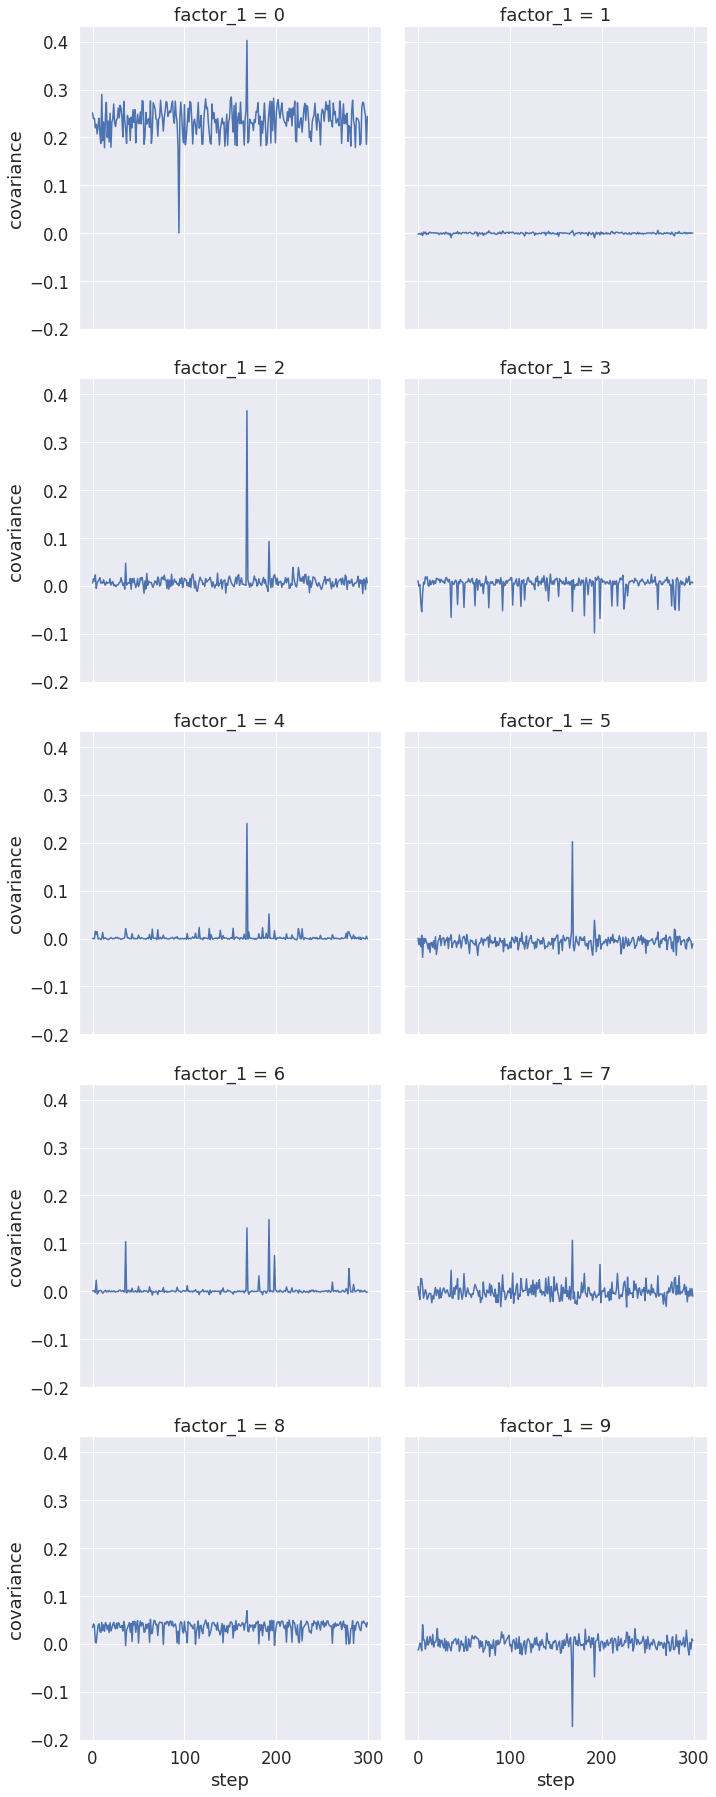

In [82]:
sns.relplot(
    data=df.loc[df["factor_2"]== 0], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

## Factor $z_1$

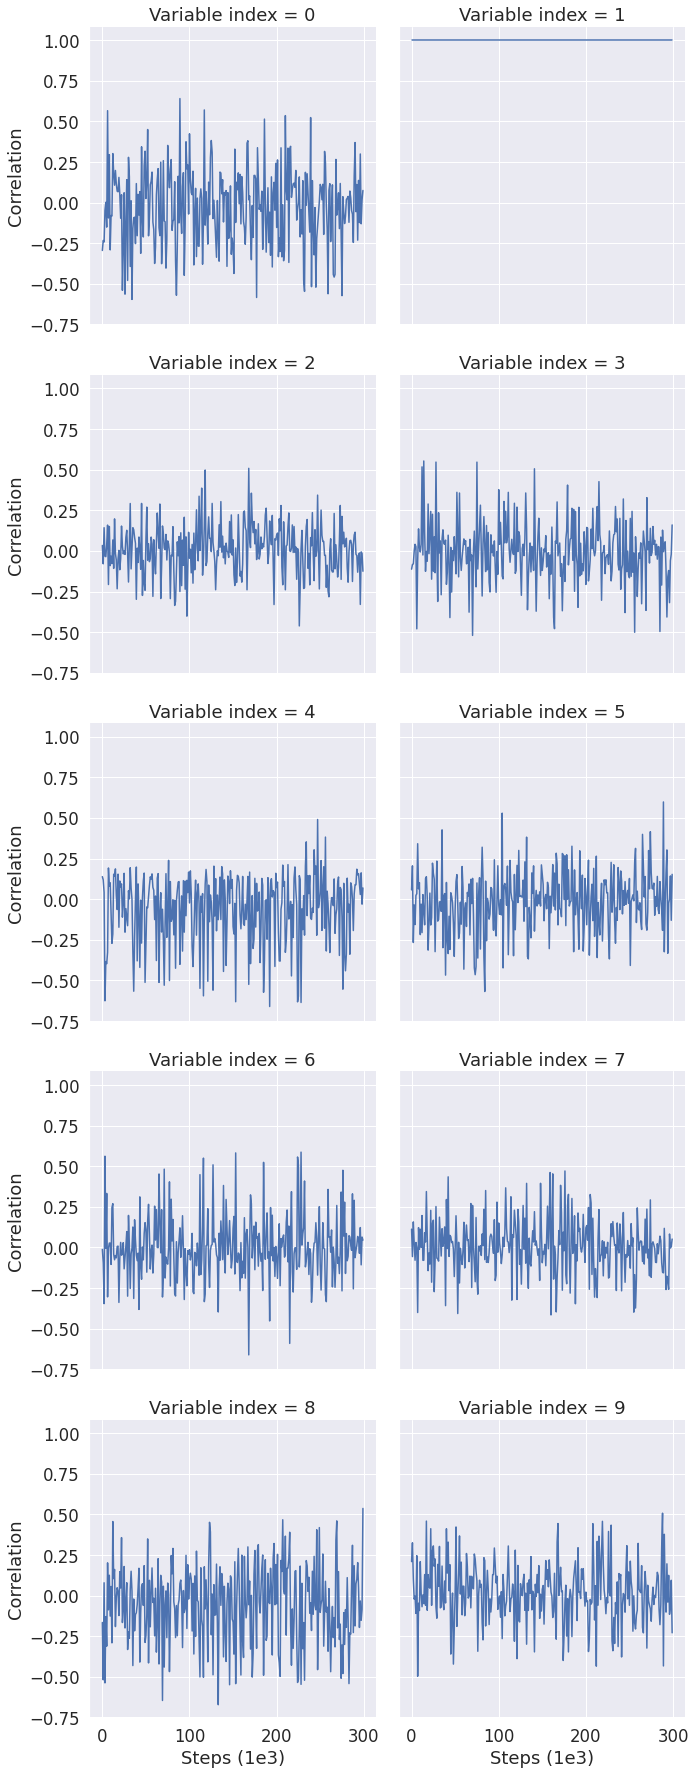

In [115]:
g = sns.relplot(
    data=df.loc[df["factor_2"]== 1].rename(columns={"factor_1": "Variable index", "correlation": "Correlation"}), x="step", y="Correlation",
    col="Variable index", 
    kind="line", col_wrap=2, palette="viridis"
)
g.axes[8].set_xlabel("Steps (1e3)")
g.axes[9].set_xlabel("Steps (1e3)")
plt.tight_layout()
plt.savefig("z1_passive_correlation_beta_vae_dsprites.pdf", dpi=300)

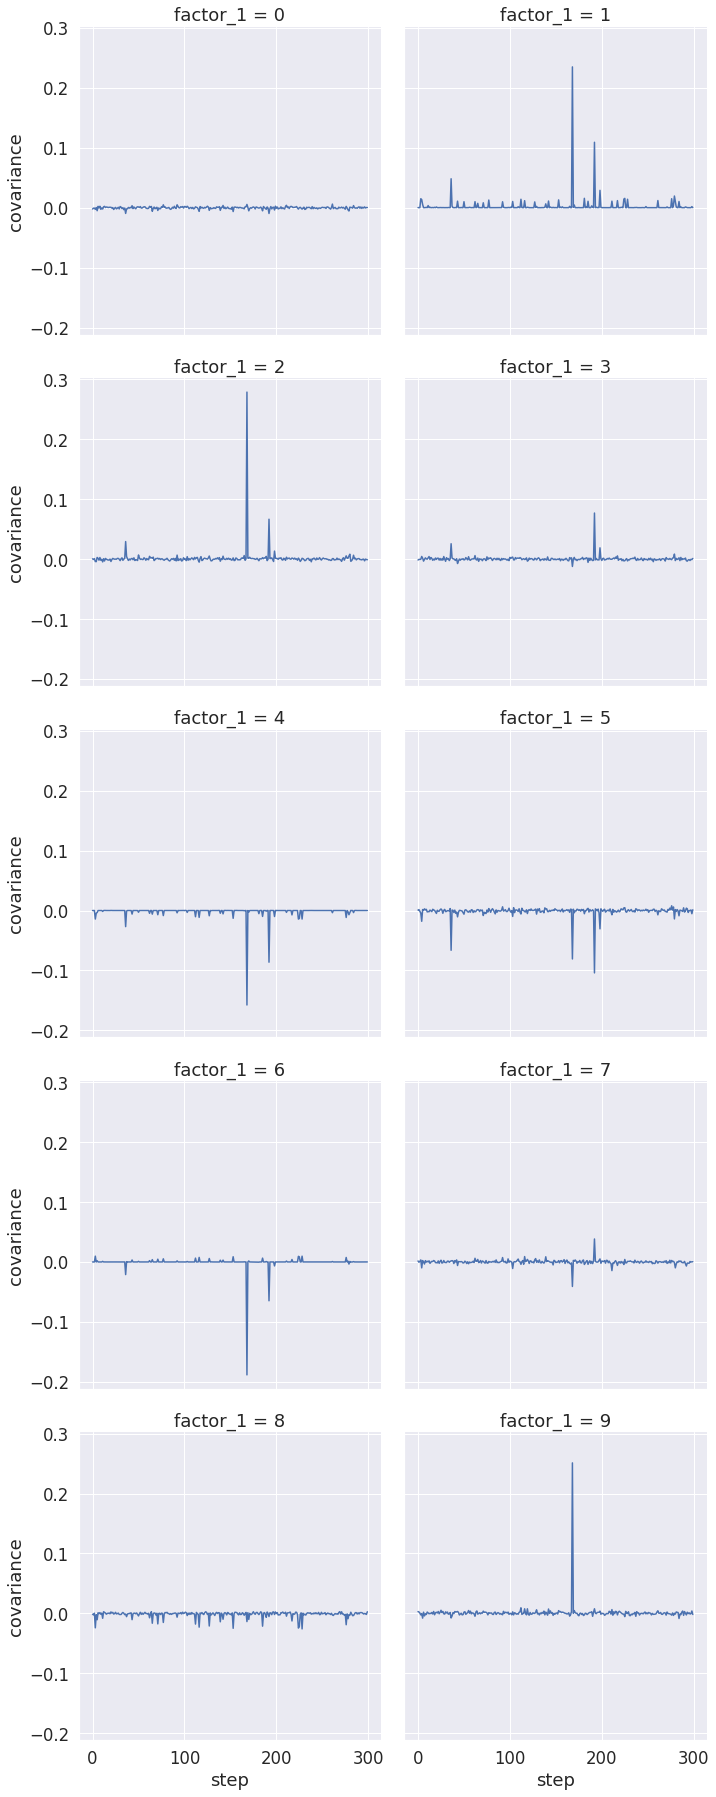

In [84]:
sns.relplot(
    data=df.loc[df["factor_2"]== 1], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

## Factor $z_2$

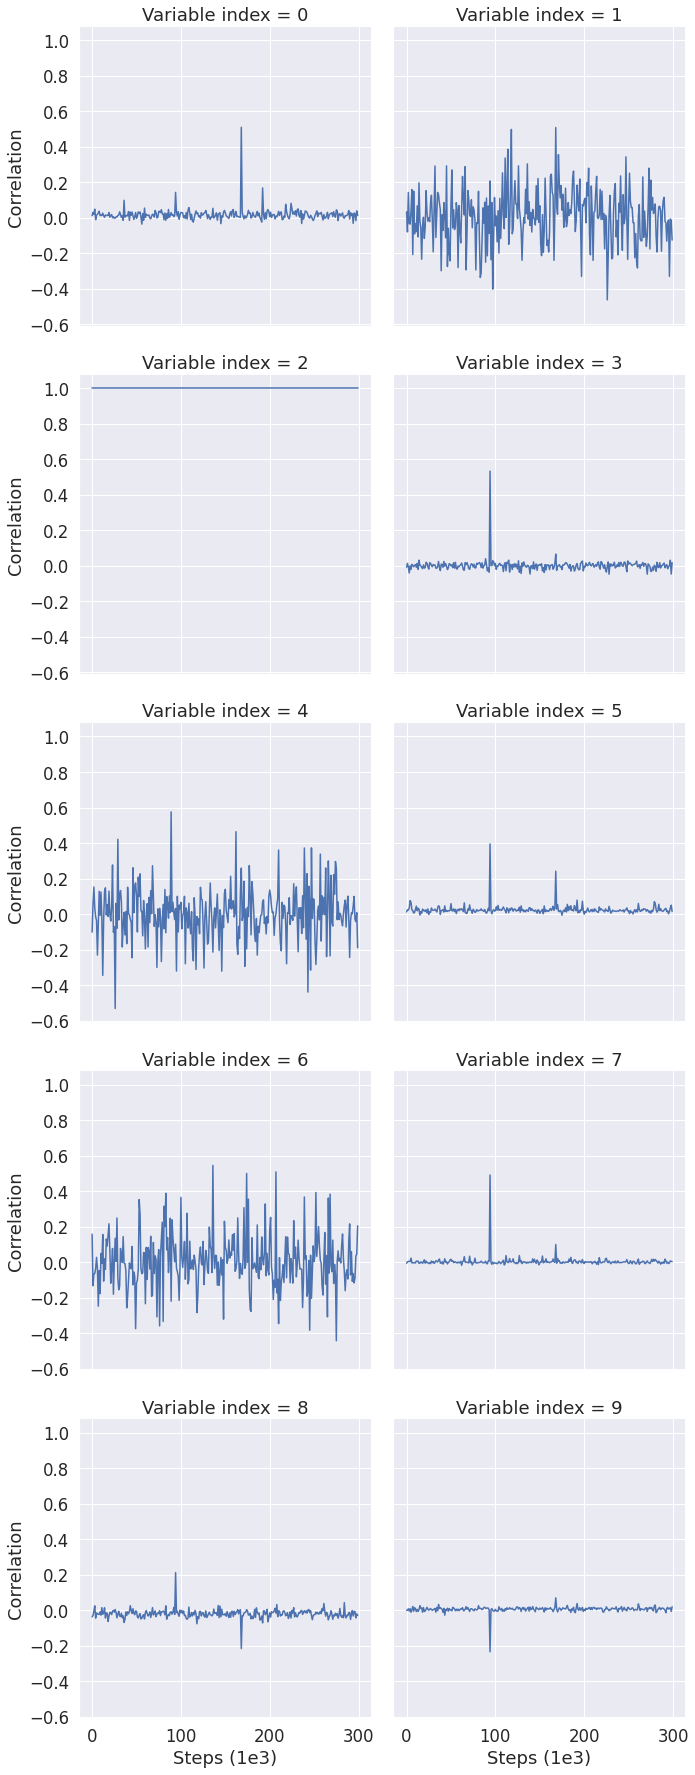

In [114]:
g = sns.relplot(
    data=df.loc[df["factor_2"]== 2].rename(columns={"factor_1": "Variable index", "correlation": "Correlation"}), x="step", y="Correlation",
    col="Variable index", 
    kind="line", col_wrap=2, palette="viridis"
)
g.axes[8].set_xlabel("Steps (1e3)")
g.axes[9].set_xlabel("Steps (1e3)")
plt.tight_layout()
plt.savefig("z2_active_correlation_beta_vae_dsprites.pdf", dpi=300)

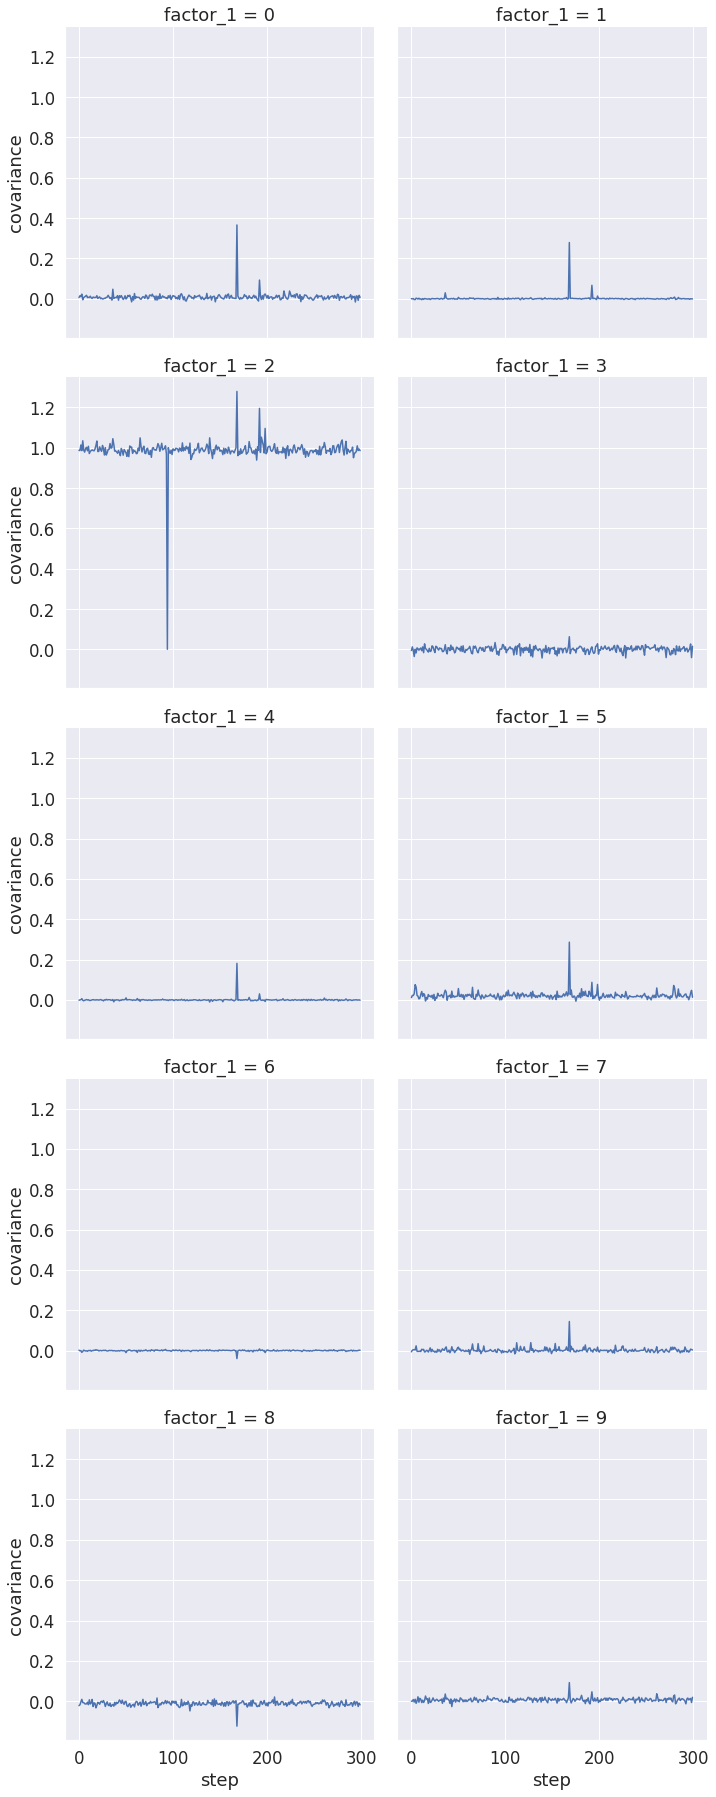

In [86]:
sns.relplot(
    data=df.loc[df["factor_2"]== 2], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

## Factor $z_3$

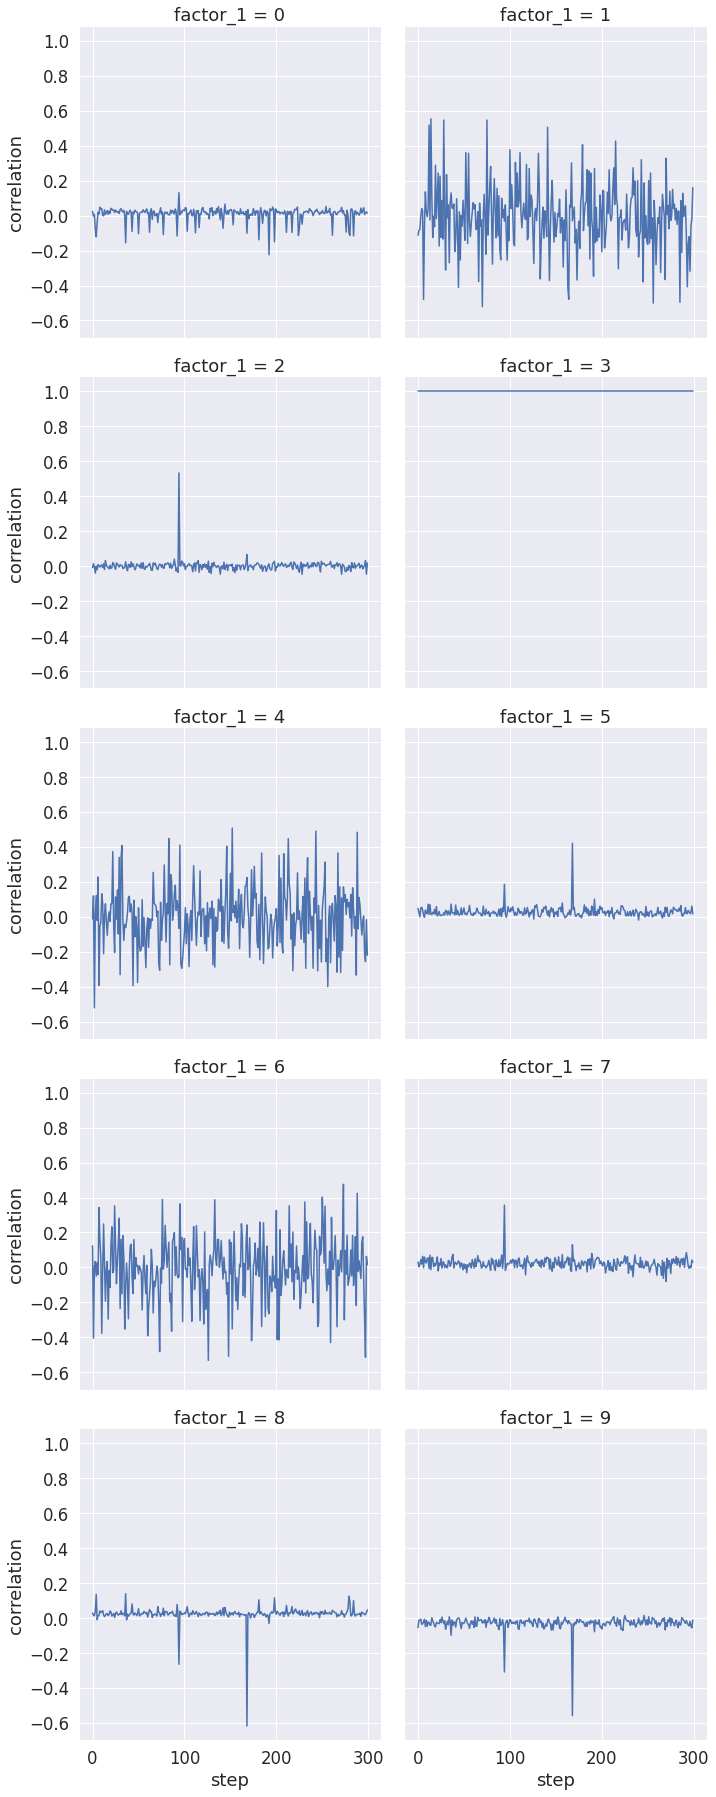

In [87]:
sns.relplot(
    data=df.loc[df["factor_2"]== 3], x="step", y="correlation",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

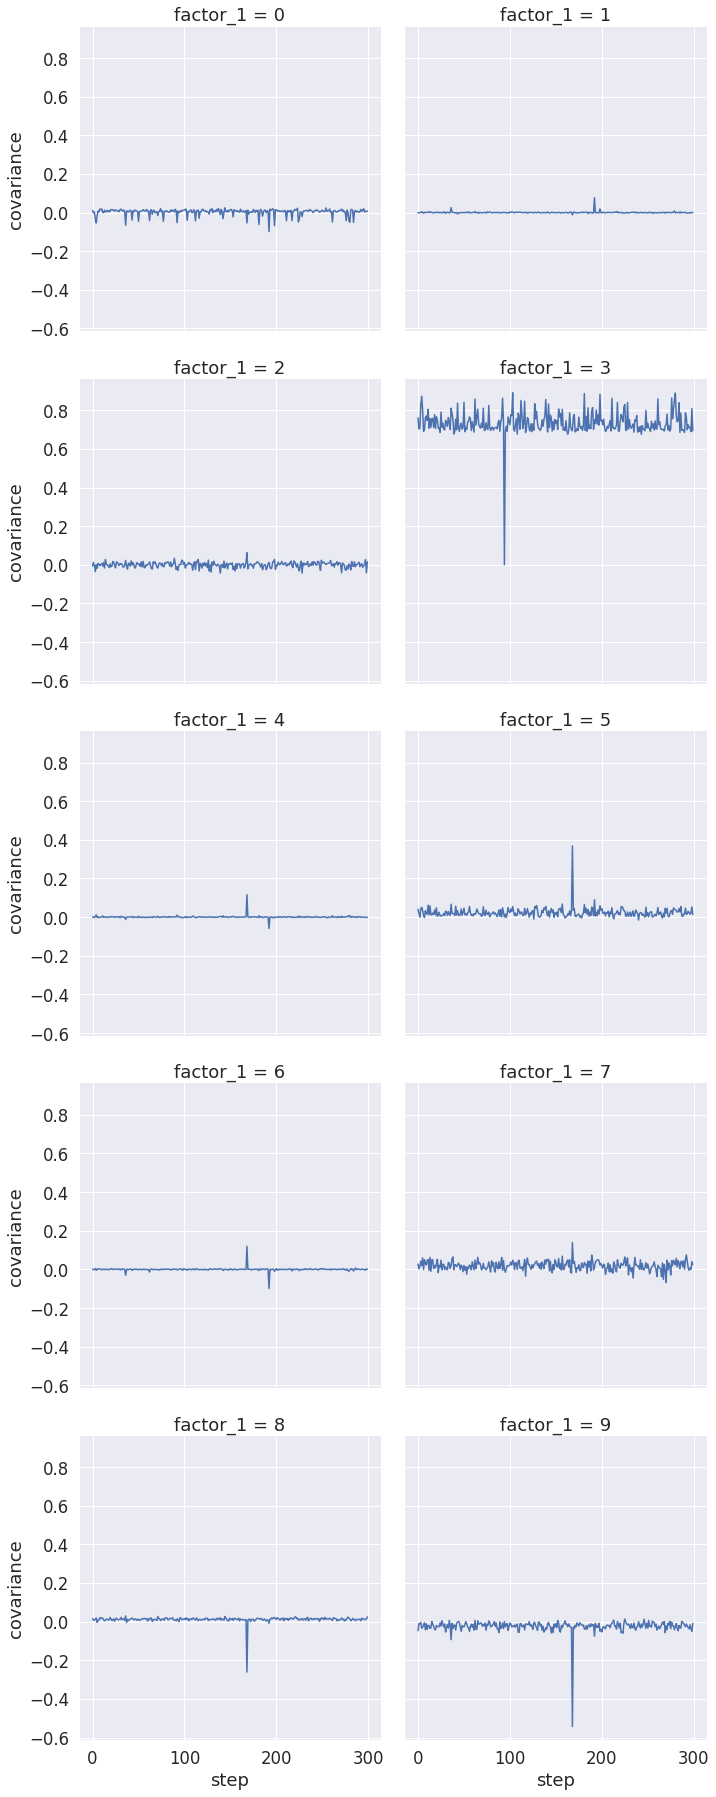

In [88]:
sns.relplot(
    data=df.loc[df["factor_2"]== 3], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

## Factor $z_4$

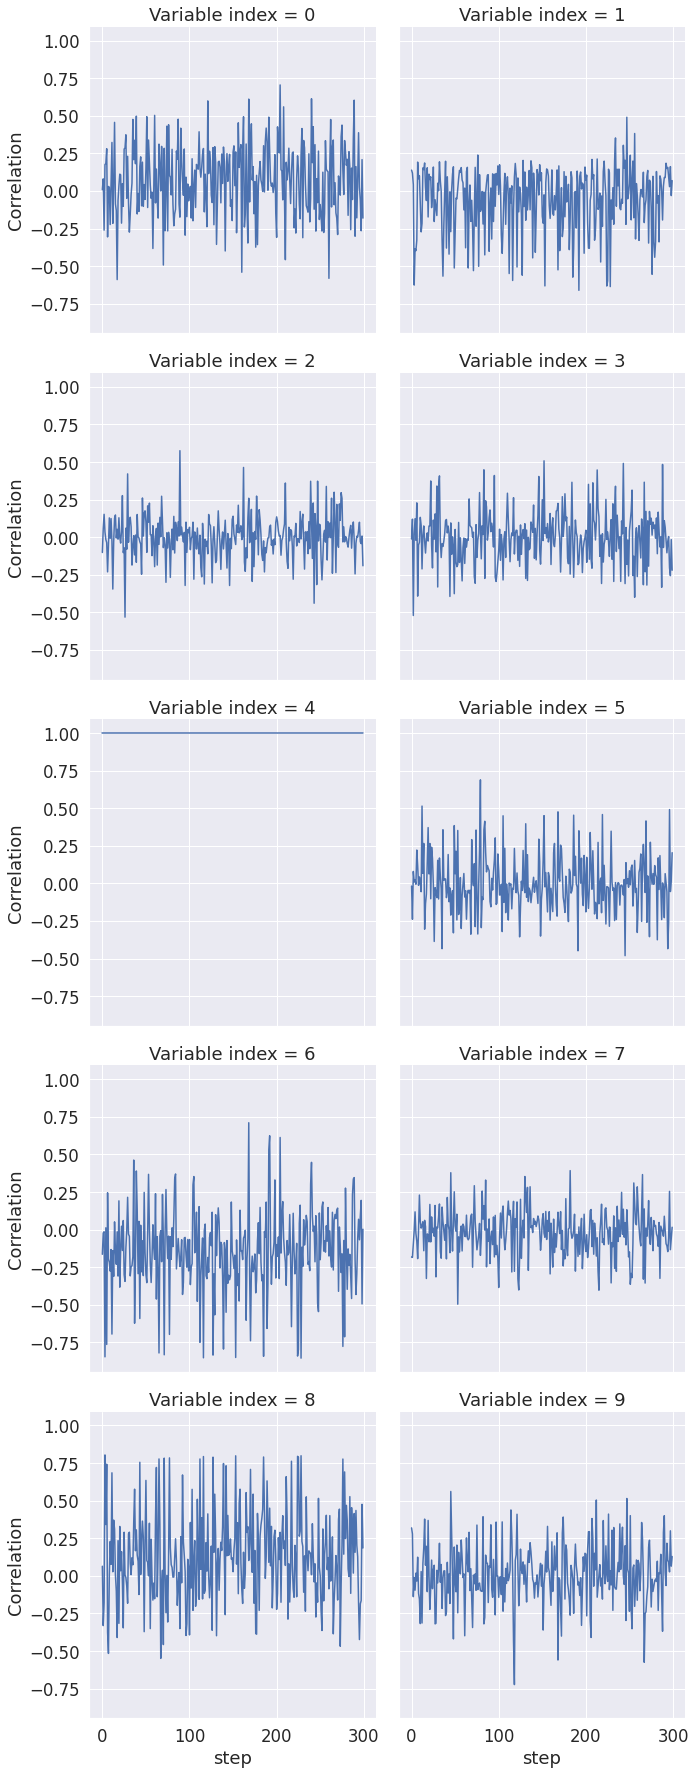

In [113]:
sns.relplot(
    data=df.loc[df["factor_2"]== 4].rename(columns={"factor_1": "Variable index", "correlation": "Correlation"}), x="step", y="Correlation",
    col="Variable index", 
    kind="line", col_wrap=2, palette="viridis"
)
g.axes[8].set_xlabel("Steps (1e3)")
g.axes[9].set_xlabel("Steps (1e3)")
plt.tight_layout()
plt.savefig("z4_passive_correlation_beta_vae_dsprites.pdf", dpi=300)

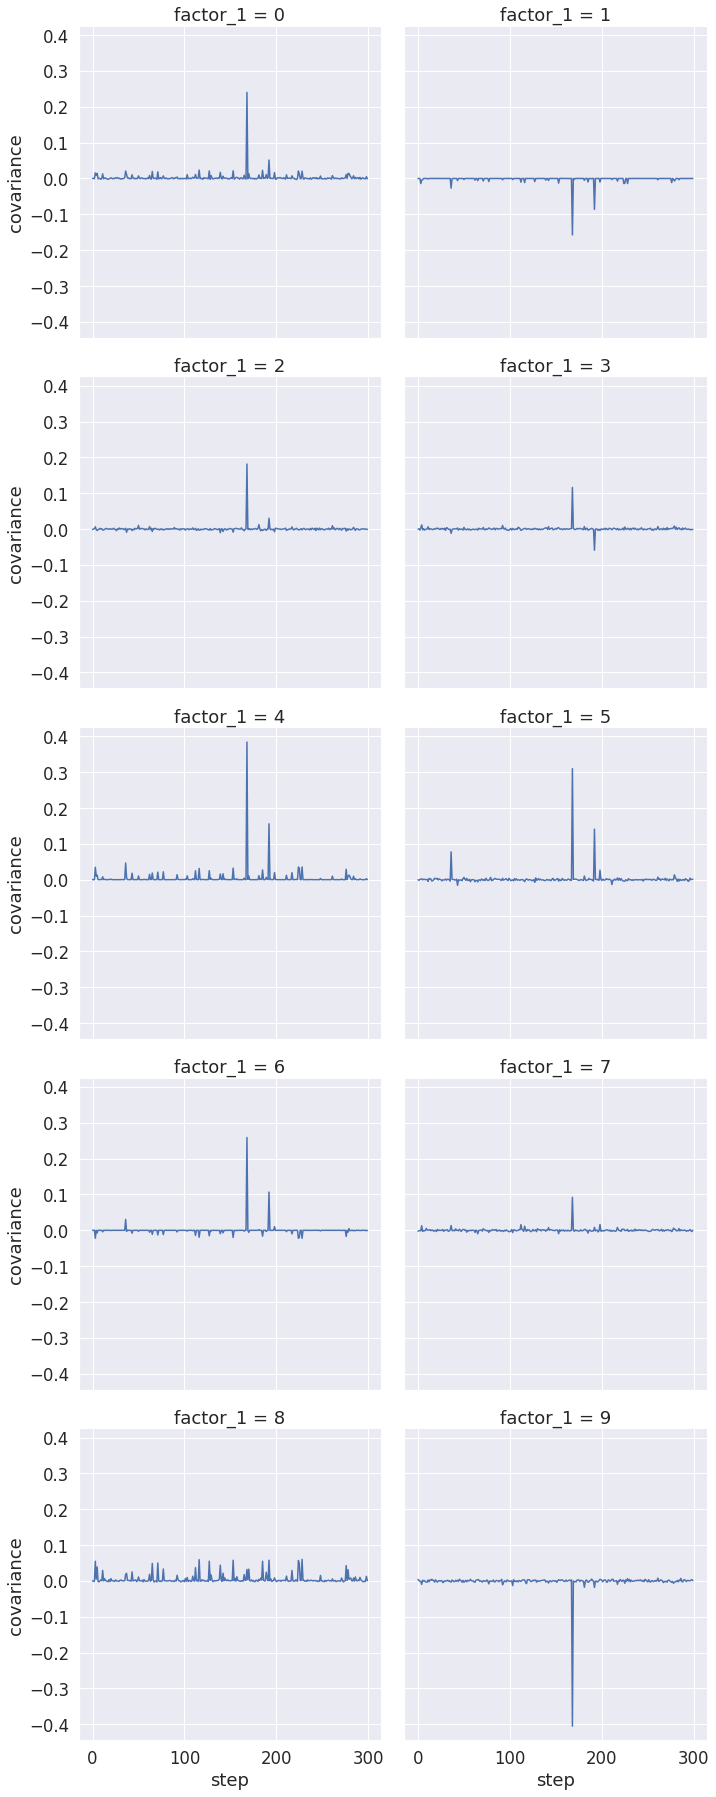

In [90]:
sns.relplot(
    data=df.loc[df["factor_2"]== 4], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

## Factor $z_5$

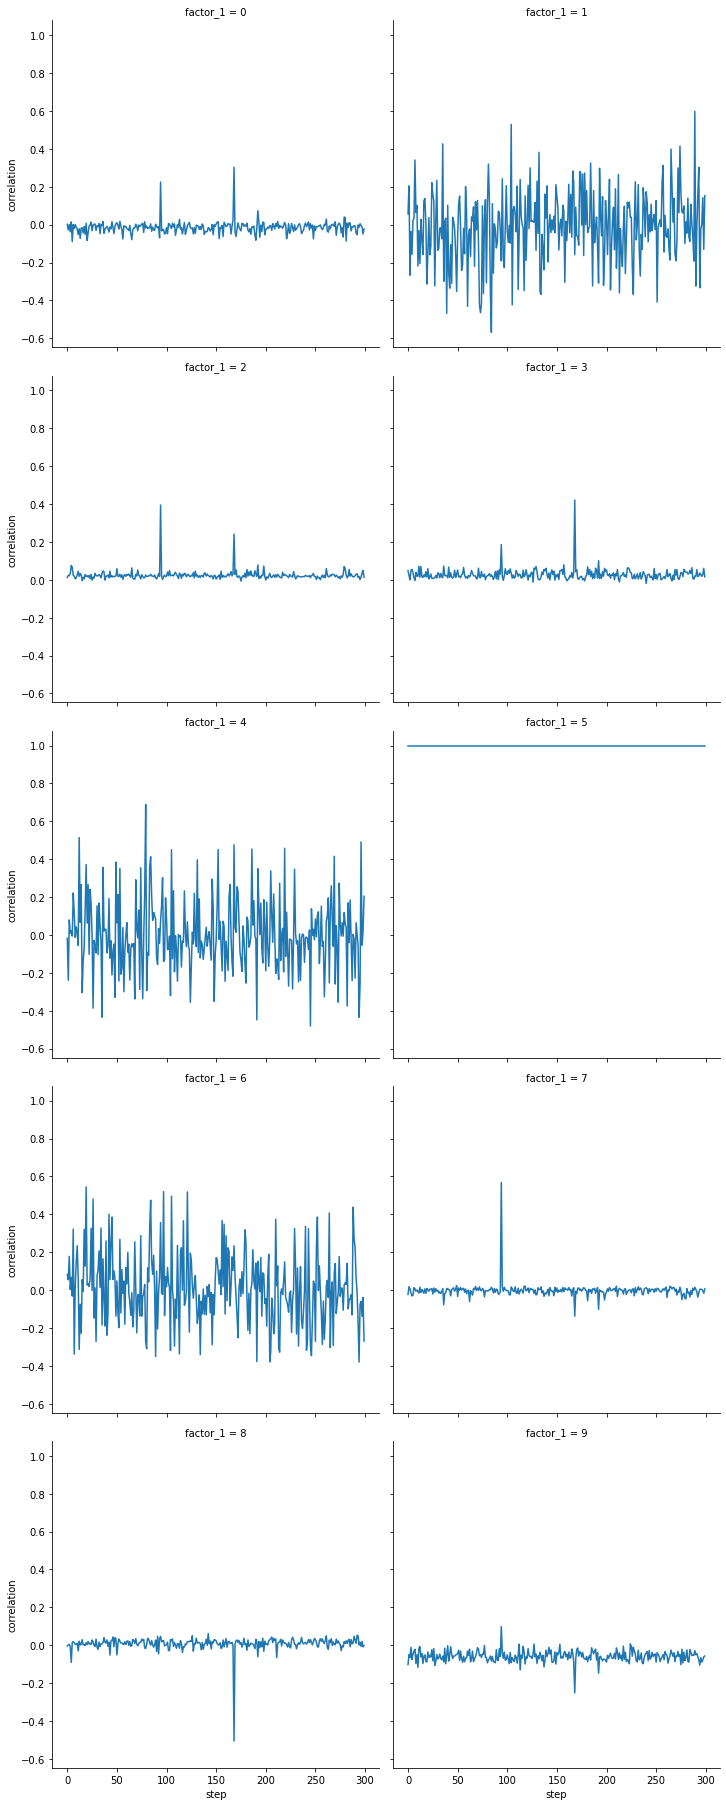

In [20]:
sns.relplot(
    data=df.loc[df["factor_2"]== 5], x="step", y="correlation",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

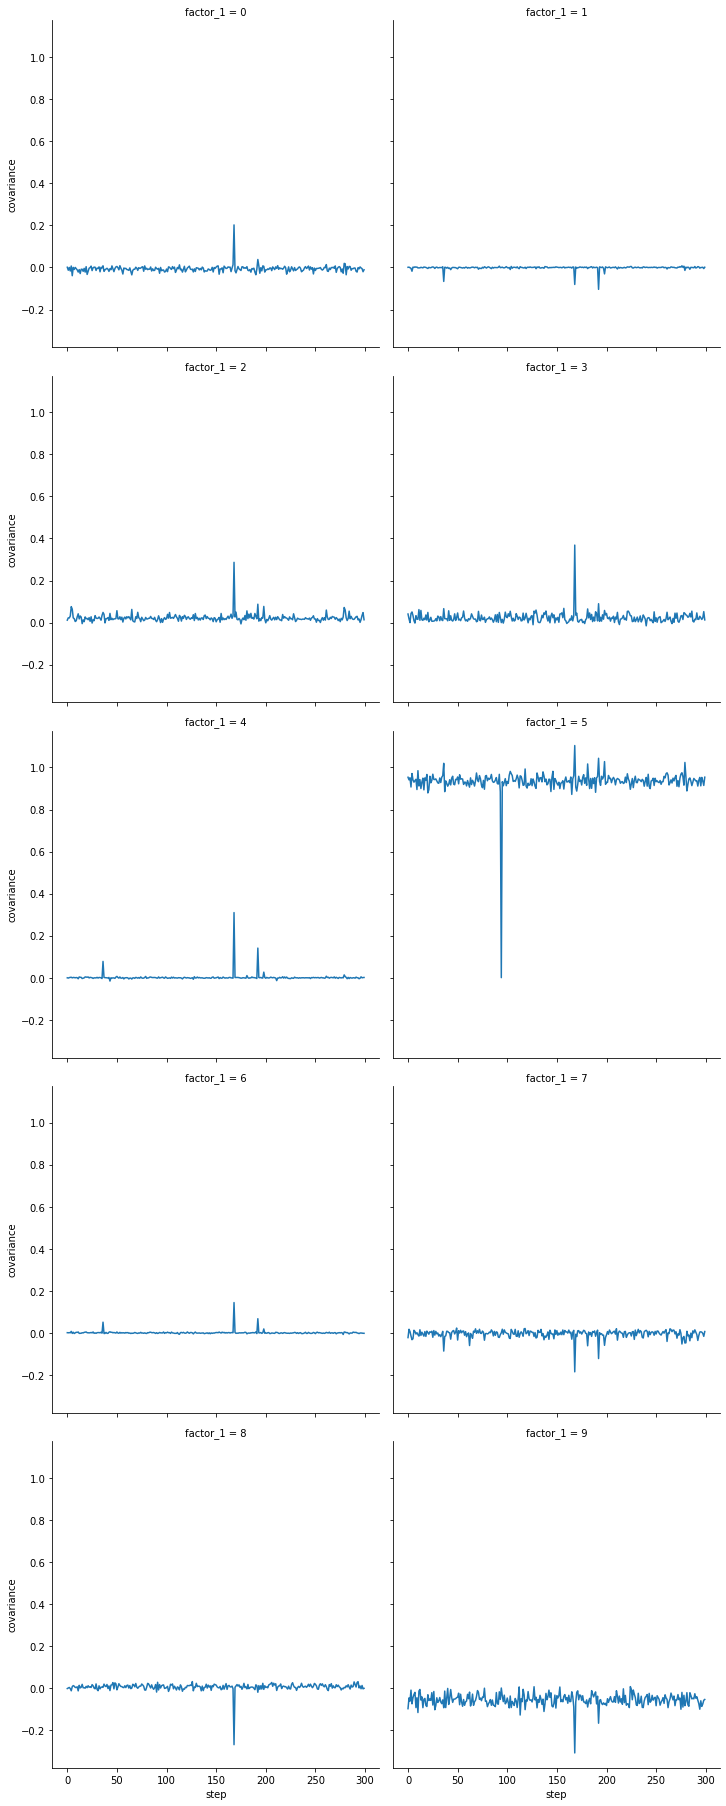

In [21]:
sns.relplot(
    data=df.loc[df["factor_2"]== 5], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

## Factor $z_6$

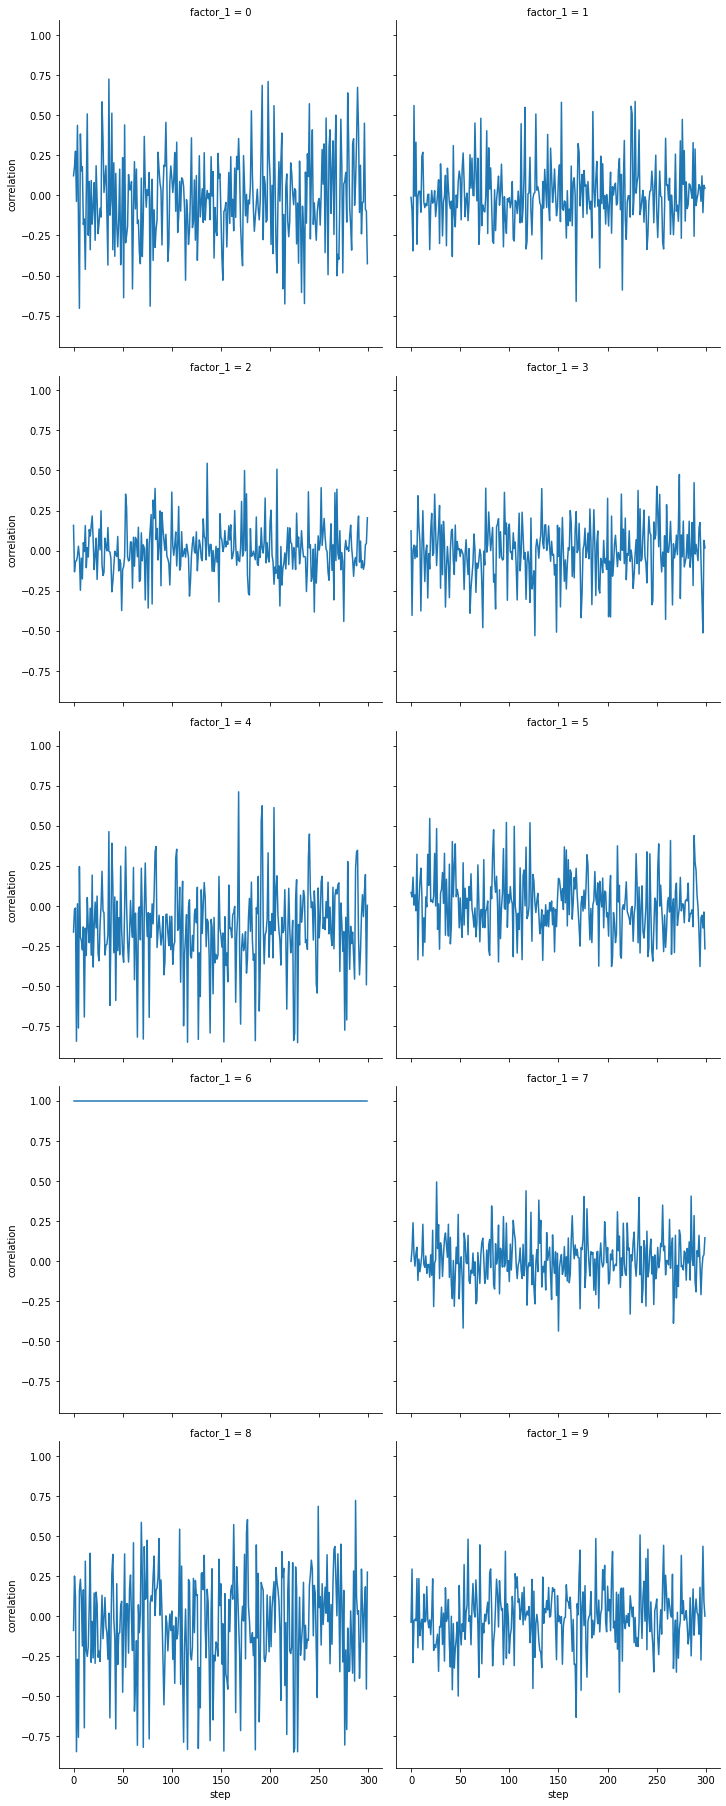

In [22]:
sns.relplot(
    data=df.loc[df["factor_2"]== 6], x="step", y="correlation",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

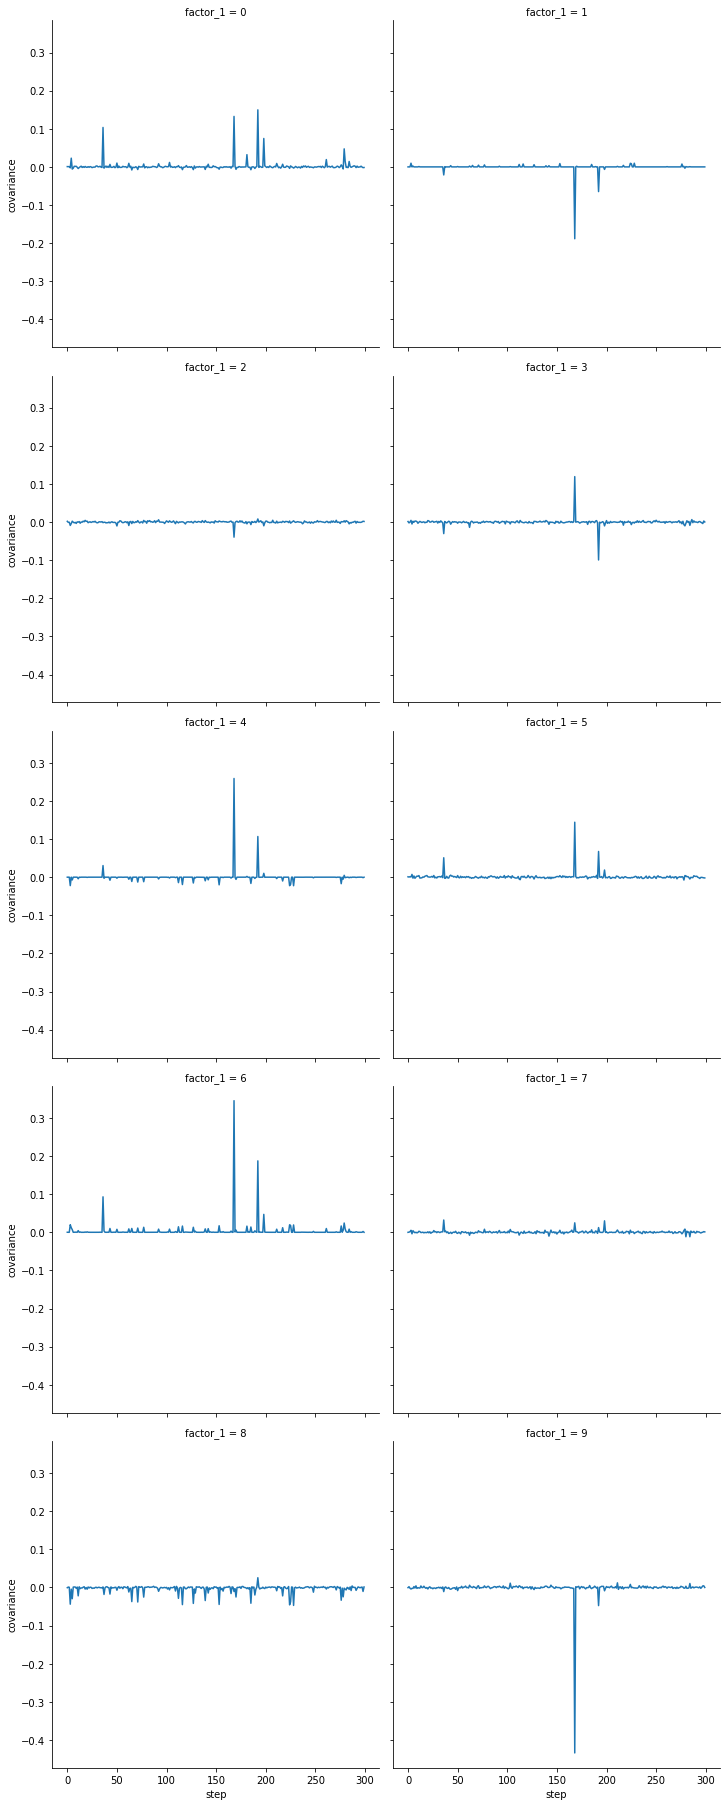

In [23]:
sns.relplot(
    data=df.loc[df["factor_2"]== 6], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

## Factor $z_7$

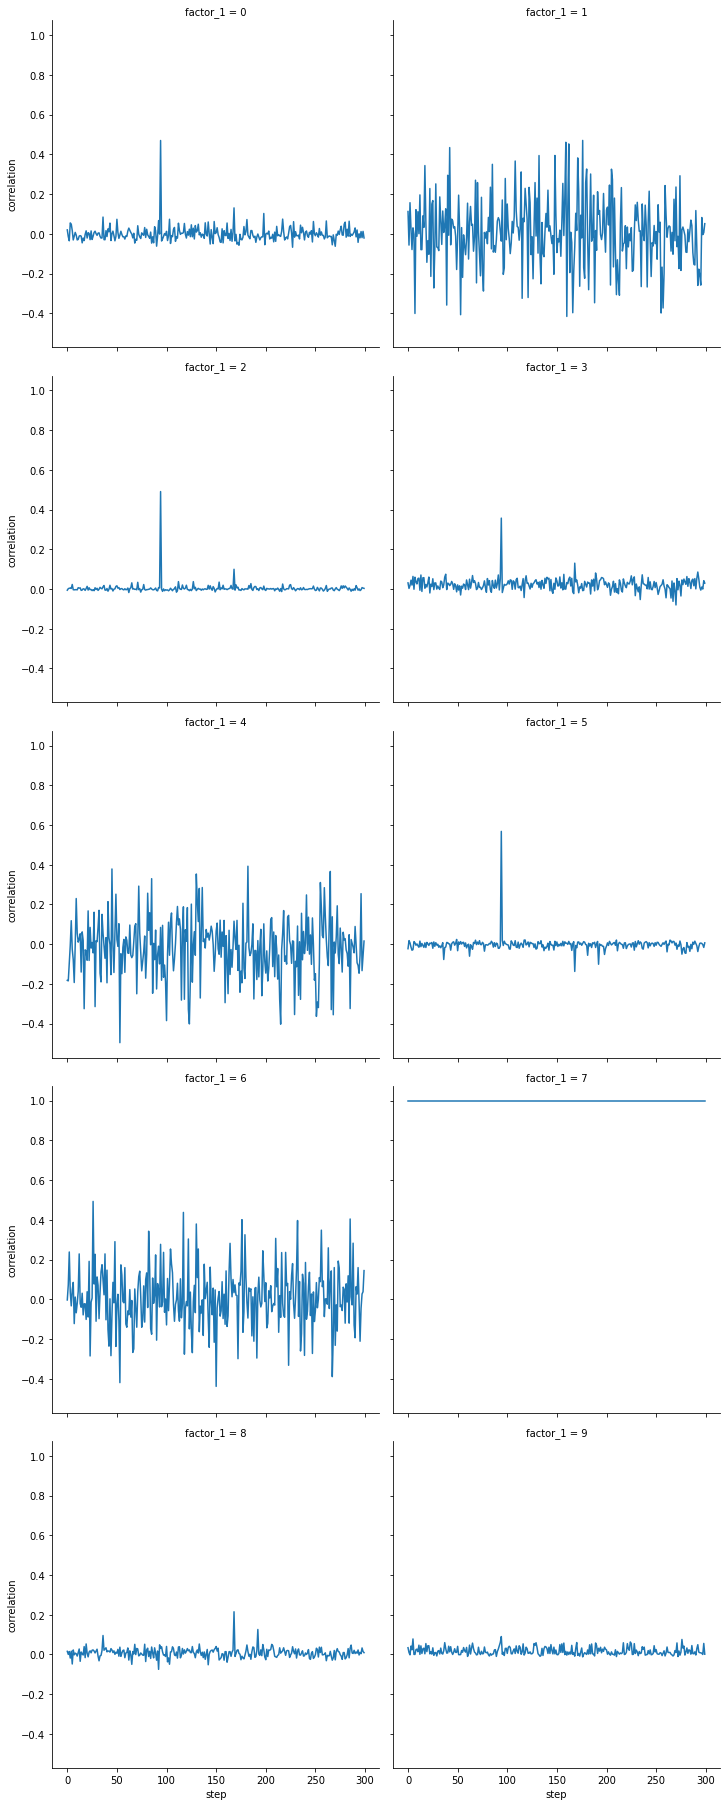

In [24]:
sns.relplot(
    data=df.loc[df["factor_2"]== 7], x="step", y="correlation",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

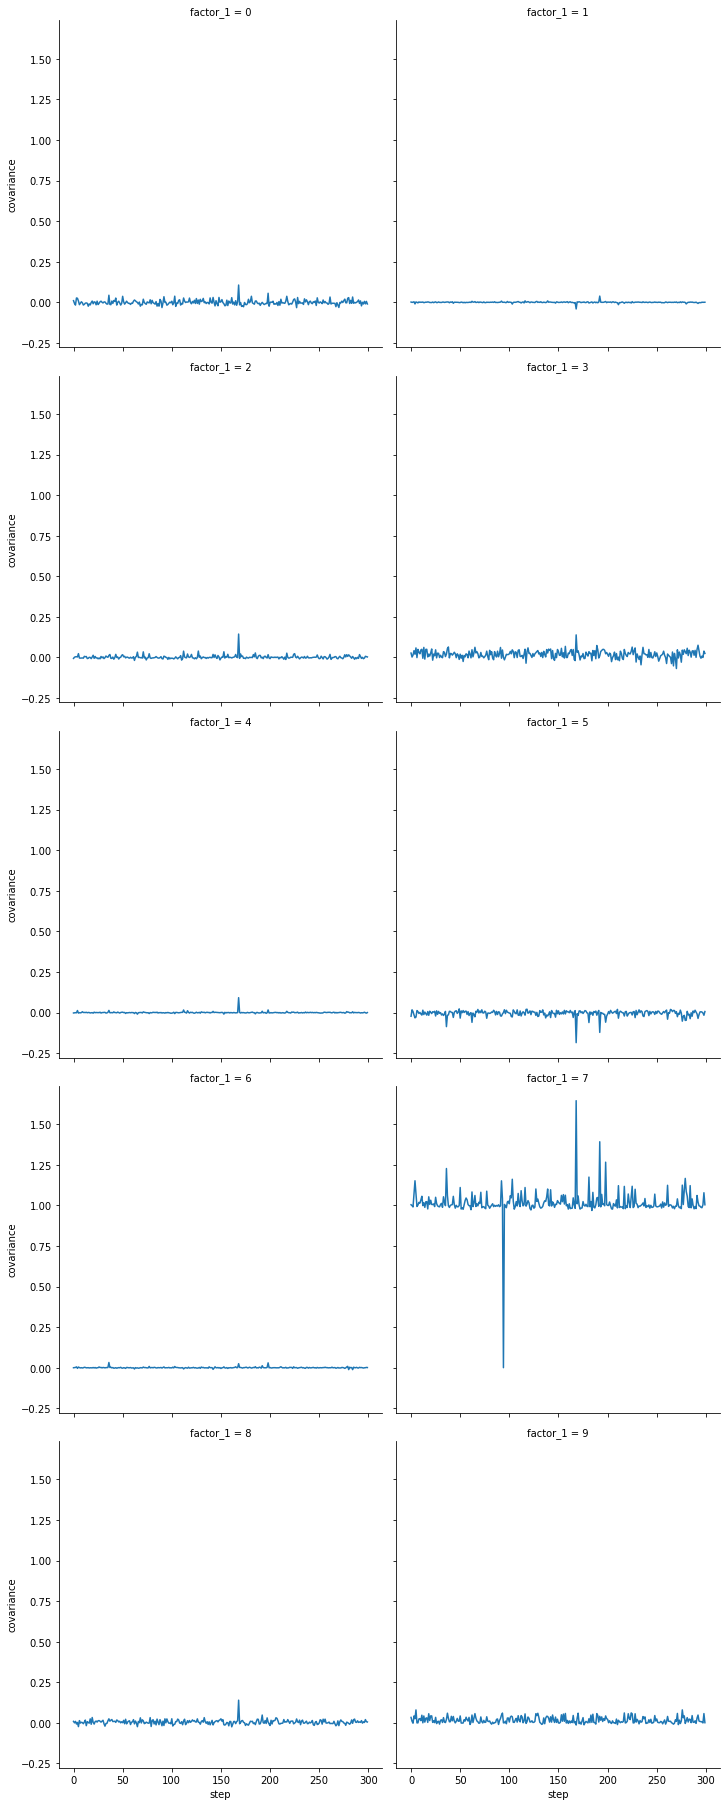

In [25]:
sns.relplot(
    data=df.loc[df["factor_2"]== 7], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

## Factor $z_8$

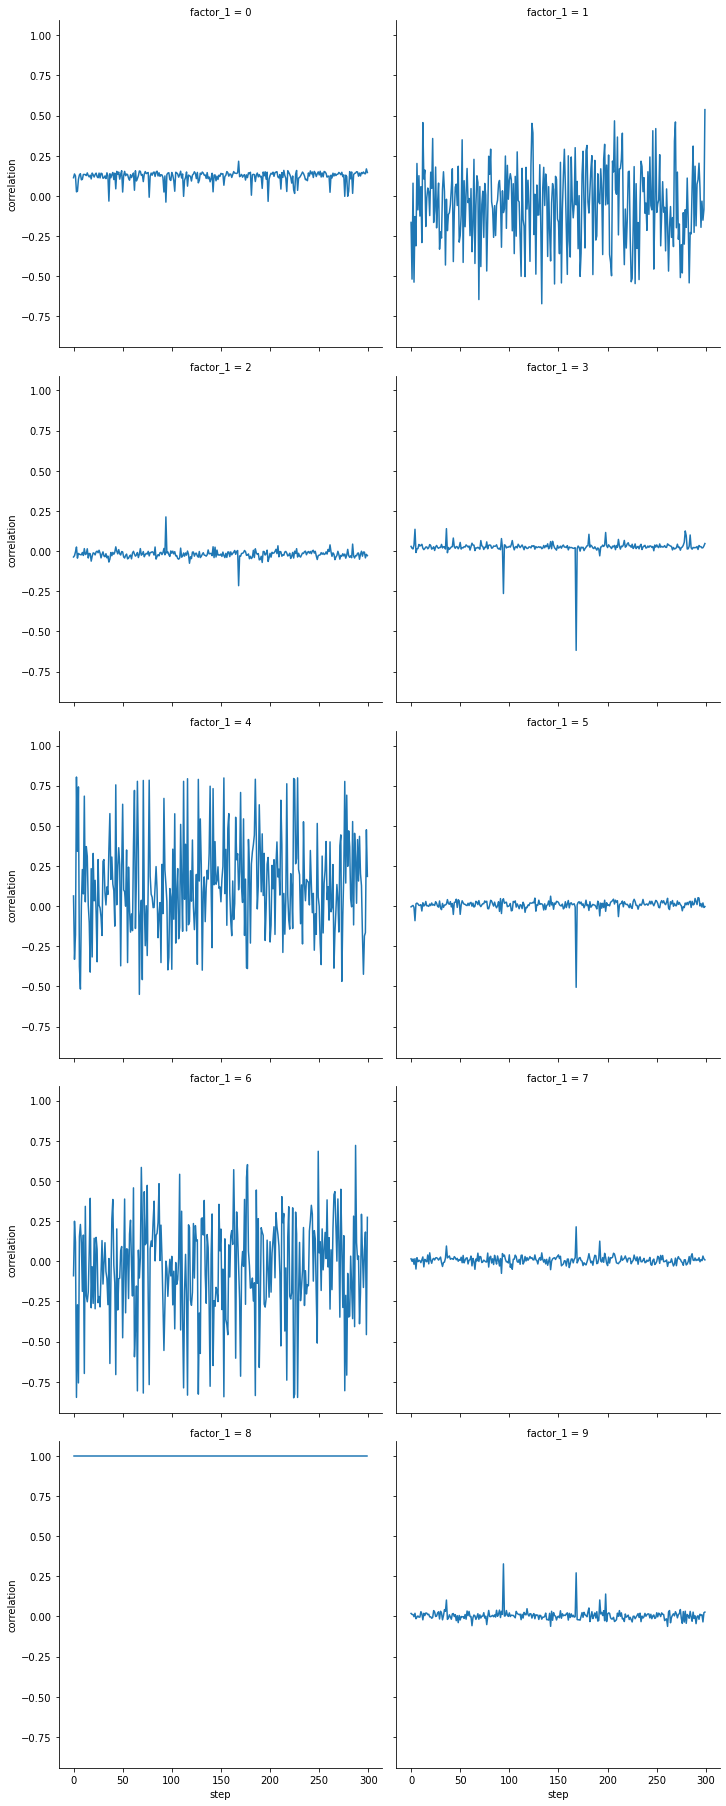

In [26]:
sns.relplot(
    data=df.loc[df["factor_2"]== 8], x="step", y="correlation",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

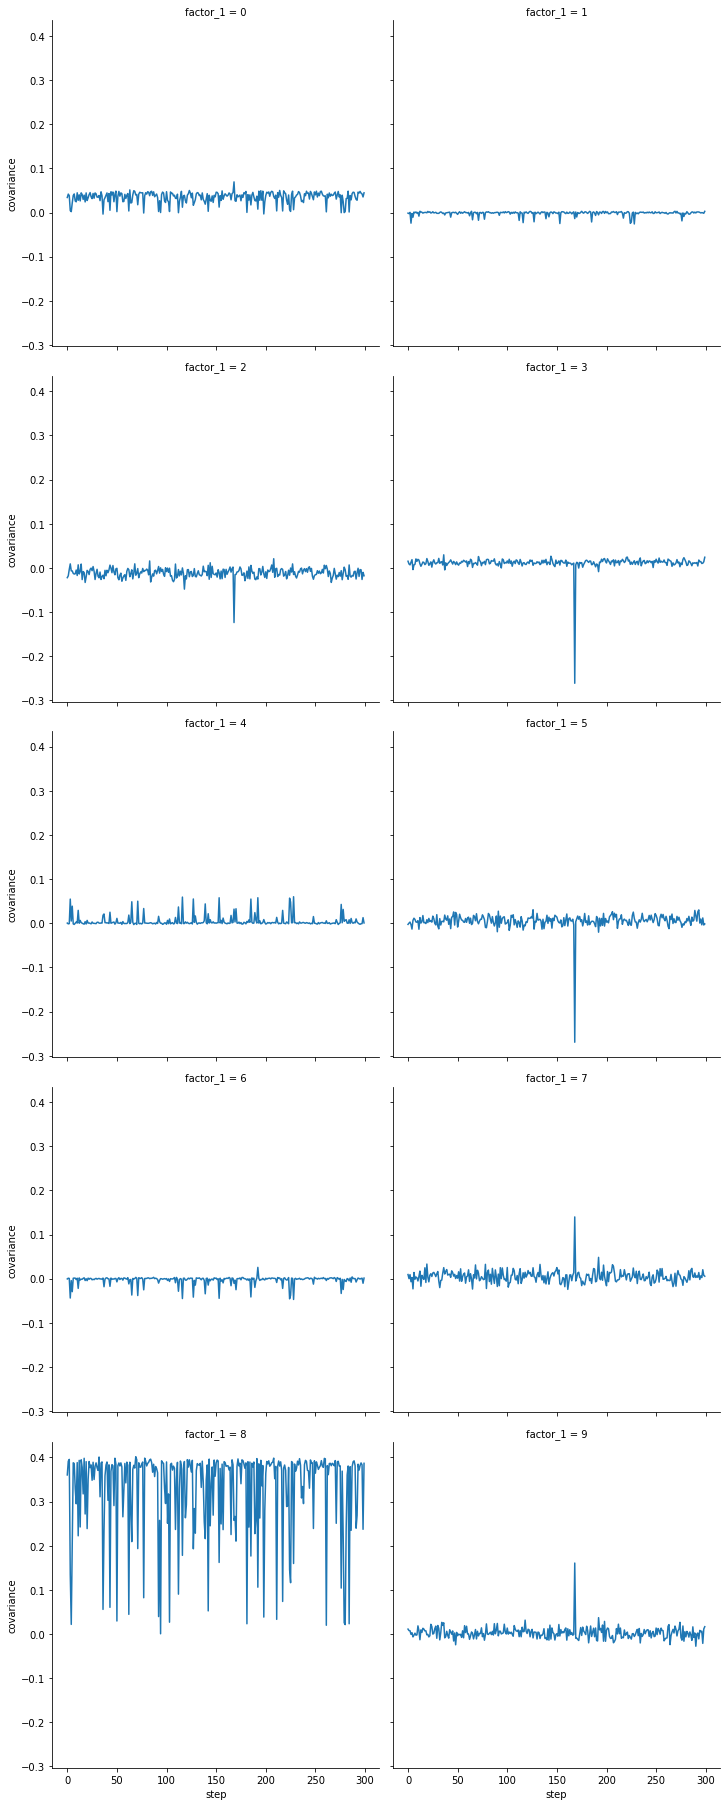

In [27]:
sns.relplot(
    data=df.loc[df["factor_2"]== 8], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

## Factor $z_9$

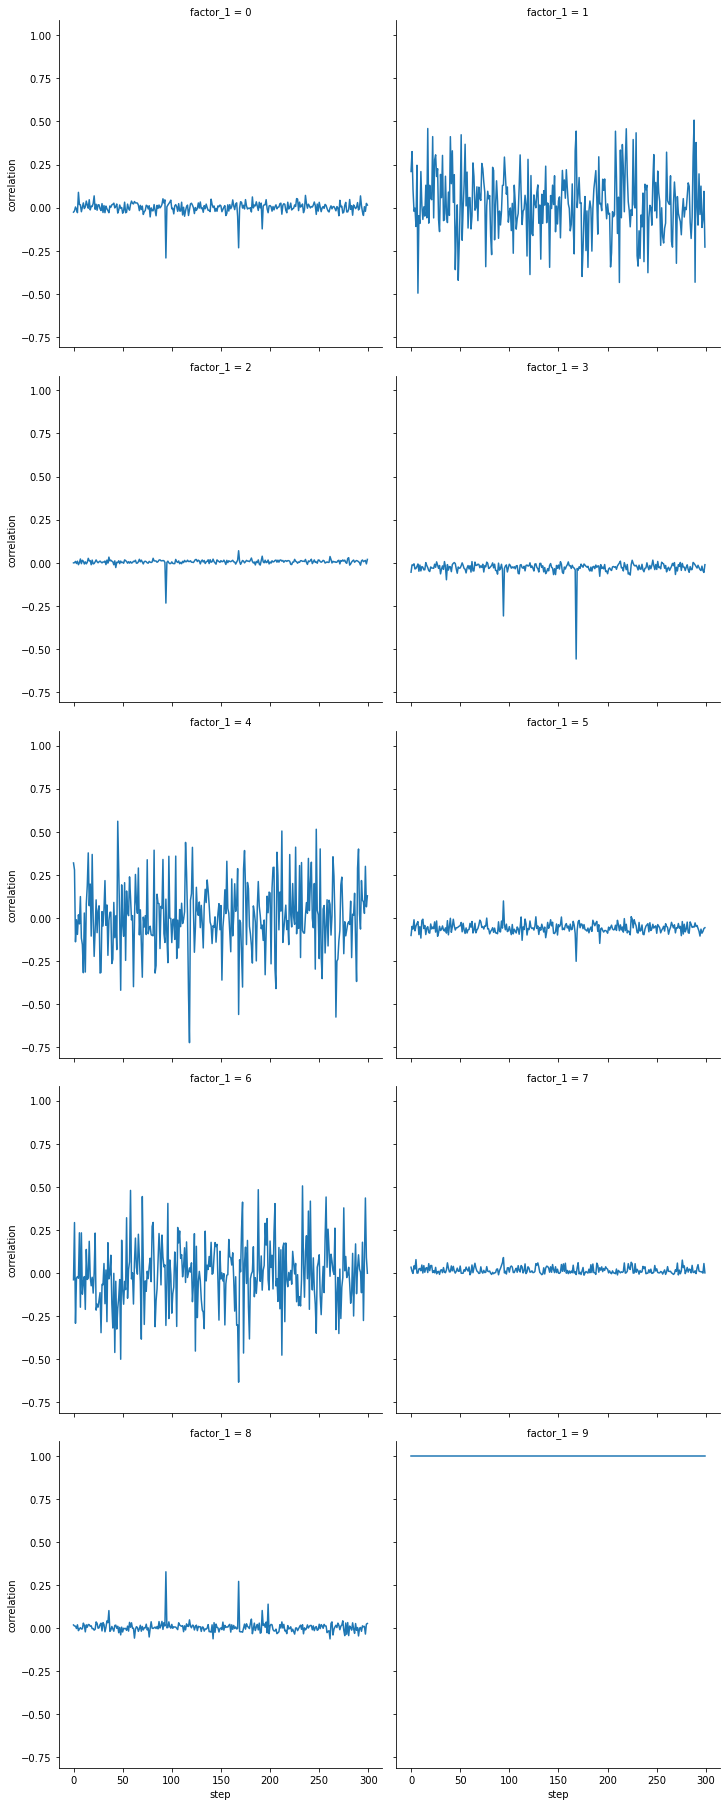

In [28]:
sns.relplot(
    data=df.loc[df["factor_2"]== 9], x="step", y="correlation",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

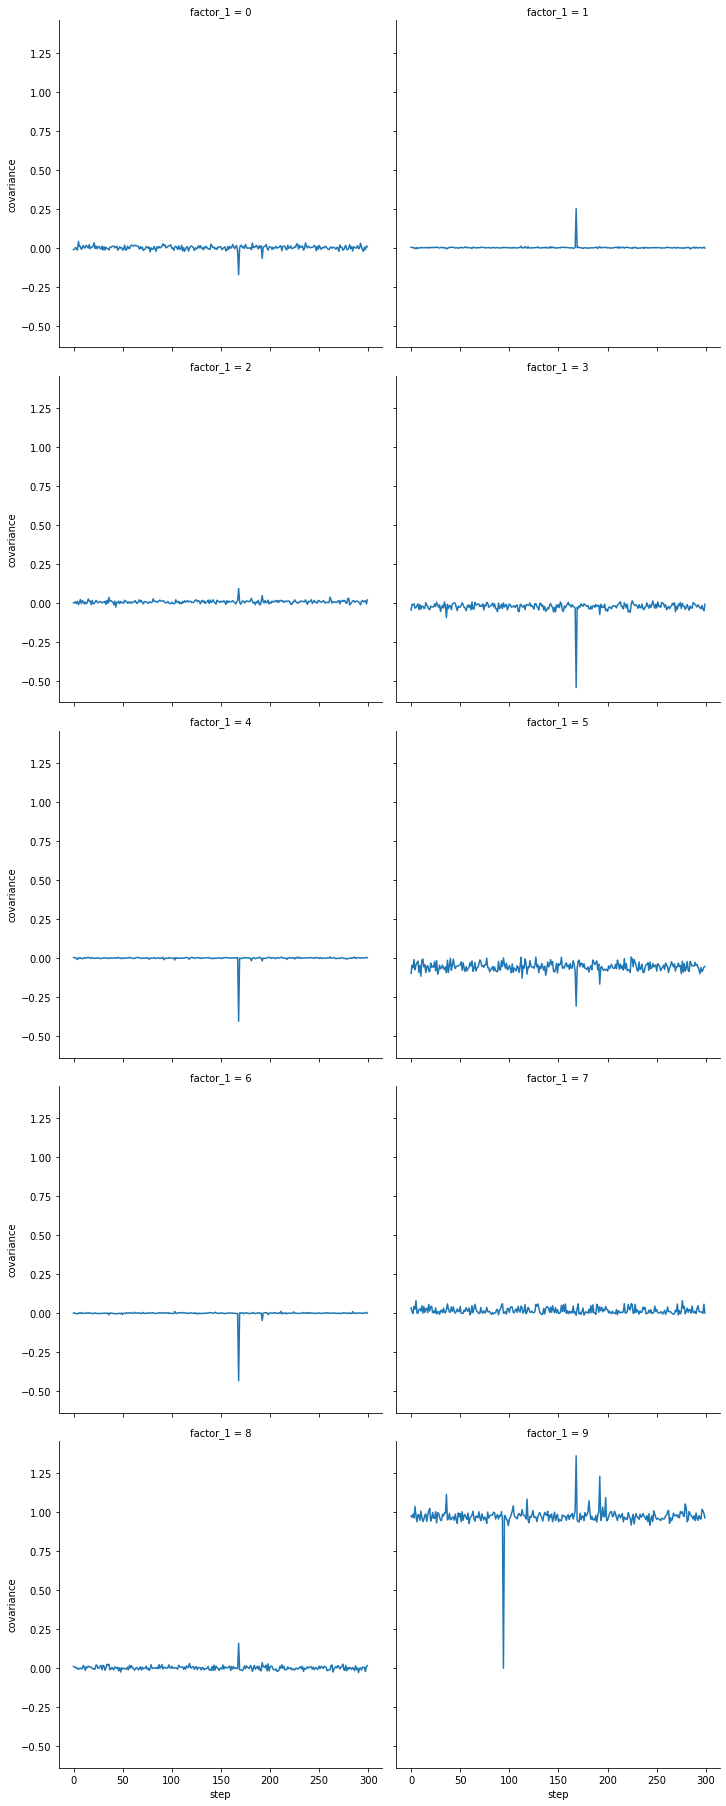

In [29]:
sns.relplot(
    data=df.loc[df["factor_2"]== 9], x="step", y="covariance",
    col="factor_1", 
    kind="line", col_wrap=2, palette="viridis"
)

In [65]:
df["abs_correlation"] = df.correlation.abs()
df_gb = df.groupby(["factor_1", "factor_2"])
df_mean = df_gb.mean().query("factor_1 != factor_2")
df_max = df_gb.max()
df_min = df_gb.min()

In [66]:
df_mean

correlation  covariance   step  abs_correlation
factor_1 factor_2                                                 
0        1           -0.028513   -0.000225  149.5         0.190617
         2            0.018360    0.009068  149.5         0.021796
         3            0.008910    0.003284  149.5         0.029246
         4            0.071531    0.002865  149.5         0.200223
         5           -0.014129   -0.006340  149.5         0.022478
...                        ...         ...    ...              ...
9        4            0.010525   -0.001455  149.5         0.147144
         5           -0.057924   -0.056184  149.5         0.058746
         6           -0.006476   -0.001534  149.5         0.137793
         7            0.016762    0.016607  149.5         0.018193
         8            0.005761    0.002727  149.5         0.018529

[90 rows x 4 columns]

In [67]:
df_mean = df_mean.groupby(level=0).mean().reset_index()

In [68]:
df_mean

factor_1  correlation  covariance   step  abs_correlation
0         0     0.017721    0.005069  149.5         0.093876
1         1    -0.013803   -0.000245  149.5         0.149557
2         2     0.005561    0.003447  149.5         0.047521
3         3     0.005116    0.003768  149.5         0.061554
4         4     0.000203    0.000880  149.5         0.164681
5         5    -0.001636   -0.001601  149.5         0.065188
6         6    -0.022657   -0.000220  149.5         0.163622
7         7     0.005218    0.004309  149.5         0.051085
8         8     0.019336    0.005387  149.5         0.104325
9         9    -0.003534   -0.006156  149.5         0.064148

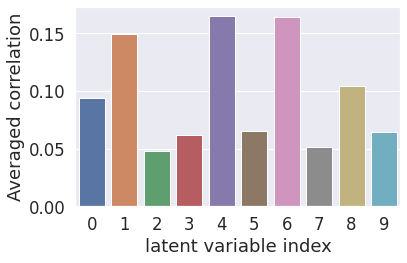

In [111]:
fig, ax = plt.subplots()
sns.barplot(x=df_mean.factor_1, y=df_mean.abs_correlation, ax=ax)
ax.set_xlabel("Latent variable index")
ax.set_ylabel("Averaged correlation")
plt.tight_layout()
plt.savefig("avg_correlation_beta_vae_dsprites.pdf", dpi=300)

In [31]:
df_mean.loc[(df_mean.index.get_level_values("factor_1") == 8)]

correlation  covariance   step  abs_correlation
factor_1 factor_2                                                 
8        0            0.120245    0.034894  149.5         0.121058
         1           -0.058727   -0.001489  149.5         0.198027
         2           -0.019357   -0.011462  149.5         0.023643
         3            0.024800    0.011439  149.5         0.031024
         4            0.137020    0.004807  149.5         0.253396
         5            0.008670    0.005411  149.5         0.019596
         6           -0.052780   -0.003020  149.5         0.254609
         7            0.008386    0.005174  149.5         0.019041
         8            1.000000    0.330198  149.5         1.000000
         9            0.005761    0.002727  149.5         0.018529

In [32]:
df_max.loc[(df_max.index.get_level_values("factor_1") == 1)]

correlation  covariance  step  abs_correlation
factor_1 factor_2                                                
1        0            0.640948    0.006033   299         0.640948
         1            1.000000    0.235056   299         1.000000
         2            0.508516    0.278794   299         0.508516
         3            0.553706    0.076941   299         0.553706
         4            0.490505    0.000213   299         0.660850
         5            0.598530    0.007940   299         0.598530
         6            0.586585    0.009688   299         0.661597
         7            0.470516    0.038363   299         0.470516
         8            0.536975    0.002882   299         0.671533
         9            0.507668    0.251212   299         0.507668

In [33]:
df_thresh = df.loc[df.abs_correlation > 0.2].groupby(["factor_1", "factor_2"]).count()

In [34]:
df_thresh = df_thresh.groupby(level=0).sum().reset_index()

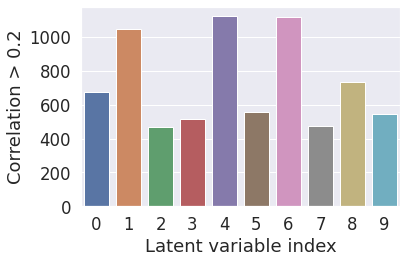

In [112]:
fig, ax = plt.subplots()
sns.barplot(x=df_thresh.factor_1, y=df_thresh.correlation, ax=ax)
ax.set_xlabel("Latent variable index")
ax.set_ylabel("Correlation > 0.2")
plt.tight_layout()
plt.savefig("count_correlation_beta_vae_dsprites.pdf", dpi=300)

In [44]:
df_thresh

factor_1  correlation  covariance  step  abs_correlation
0         0          675         675   675              675
1         1         1049        1049  1049             1049
2         2          468         468   468              468
3         3          517         517   517              517
4         4         1122        1122  1122             1122
5         5          555         555   555              555
6         6         1120        1120  1120             1120
7         7          472         472   472              472
8         8          734         734   734              734
9         9          546         546   546              546